In [35]:
PRICE_URL = "https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start={}&end={}&period={}"

In [9]:
from datetime import datetime, timezone


PERIOD = 86400


def date_to_utc_timestamp(c_date):
    return int(c_date.replace(tzinfo=timezone.utc).timestamp())


def utc_timestamp_to_date(ts):
    return datetime.fromtimestamp(ts, tz=timezone.utc)


start_date = datetime(2017, 1, 1)
start_ts = date_to_utc_timestamp(start_date)
print(start_ts)
print(utc_timestamp_to_date(start_ts))

1483228800
2017-01-01 00:00:00+00:00


In [38]:
import requests
import pandas as pd


def get_btc_eth_result(start_ts, end_ts, period):
    result_data = requests.get(PRICE_URL.format(start_ts, end_ts, period)).json()
    return result_data


result_data = get_btc_eth_result(start_ts, start_ts + PERIOD * 3, PERIOD)
df = pd.DataFrame(result_data)
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1483228800000,0.00893,0.00800,0.00833,0.00820,5968.975,50.56206,0.00847
1,1483315200000,0.00843,0.00782,0.00819,0.00822,5162.784,41.82619,0.0081
2,1483401600000,0.00975,0.00803,0.00821,0.00928,12499.794,113.54513,0.00908
3,1483488000000,0.01009,0.00900,0.00928,0.00974,14953.471,145.23739,0.00971


In [39]:
start_date = datetime(2017, 1, 1)
start_ts = date_to_utc_timestamp(start_date)
current_ts = date_to_utc_timestamp(datetime.now())
result_data = []


print(datetime.now())
while start_ts < current_ts:
    end_ts = start_ts + PERIOD * 90
    current_data = get_btc_eth_result(start_ts, end_ts, PERIOD)
    result_data += current_data

    start_ts = end_ts + PERIOD
    print(utc_timestamp_to_date(start_ts))


print(len(result_data))
df = pd.DataFrame(result_data)
df.head()

2023-04-20 21:41:07.965611
2017-04-02 00:00:00+00:00
2017-07-02 00:00:00+00:00
2017-10-01 00:00:00+00:00
2017-12-31 00:00:00+00:00
2018-04-01 00:00:00+00:00
2018-07-01 00:00:00+00:00
2018-09-30 00:00:00+00:00
2018-12-30 00:00:00+00:00
2019-03-31 00:00:00+00:00
2019-06-30 00:00:00+00:00
2019-09-29 00:00:00+00:00
2019-12-29 00:00:00+00:00
2020-03-29 00:00:00+00:00
2020-06-28 00:00:00+00:00
2020-09-27 00:00:00+00:00
2020-12-27 00:00:00+00:00
2021-03-28 00:00:00+00:00
2021-06-27 00:00:00+00:00
2021-09-26 00:00:00+00:00
2021-12-26 00:00:00+00:00
2022-03-27 00:00:00+00:00
2022-06-26 00:00:00+00:00
2022-09-25 00:00:00+00:00
2022-12-25 00:00:00+00:00
2023-03-26 00:00:00+00:00
2023-06-25 00:00:00+00:00
2301


,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1483228800000,0.00893,0.00800,0.00833,0.00820,5968.975,50.56206,0.00847
1,1483315200000,0.00843,0.00782,0.00819,0.00822,5162.784,41.82619,0.0081
2,1483401600000,0.00975,0.00803,0.00821,0.00928,12499.794,113.54513,0.00908
3,1483488000000,0.01009,0.00900,0.00928,0.00974,14953.471,145.23739,0.00971
4,1483574400000,0.01044,0.00925,0.00974,0.01018,15295.67,152.79732,0.00998


In [40]:
df.shape

(2301, 8)

In [41]:
df.tail()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
2296,1681603200000,0.07010,0.06879,0.06902,0.06991,343.287,23.80522,0.06934
2297,1681689600000,0.07084,0.06965,0.06991,0.07047,345.325,24.26315,0.07026
2298,1681776000000,0.07089,0.06870,0.07048,0.06921,292.17,20.32662,0.06957
2299,1681862400000,0.06936,0.06710,0.06924,0.06717,522.657,35.66393,0.06824
2300,1681948800000,0.06841,0.06710,0.06715,0.06841,198.737,13.45478,0.0677


In [42]:
df.to_csv("btc_eth.csv", index=False)

In [43]:
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1483228800000,0.00893,0.00800,0.00833,0.00820,5968.975,50.56206,0.00847
1,1483315200000,0.00843,0.00782,0.00819,0.00822,5162.784,41.82619,0.0081
2,1483401600000,0.00975,0.00803,0.00821,0.00928,12499.794,113.54513,0.00908
3,1483488000000,0.01009,0.00900,0.00928,0.00974,14953.471,145.23739,0.00971
4,1483574400000,0.01044,0.00925,0.00974,0.01018,15295.67,152.79732,0.00998


In [50]:
# df["high"] = df["high"].astype(float)
# df["low"] = df["low"].astype(float)
df["btc_eth_low"] = 1 / df["high"]
df["btc_eth_high"] = 1 / df["low"]
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,btc_eth_low,btc_eth_high
0,1483228800000,0.00893,0.00800,0.00833,0.00820,5968.975,50.56206,0.00847,111.982083,125.000000
1,1483315200000,0.00843,0.00782,0.00819,0.00822,5162.784,41.82619,0.0081,118.623962,127.877238
2,1483401600000,0.00975,0.00803,0.00821,0.00928,12499.794,113.54513,0.00908,102.564103,124.533001
3,1483488000000,0.01009,0.00900,0.00928,0.00974,14953.471,145.23739,0.00971,99.108028,111.111111
4,1483574400000,0.01044,0.00925,0.00974,0.01018,15295.67,152.79732,0.00998,95.785441,108.108108


In [52]:
print(utc_timestamp_to_date(1483228800000/1000))
print(type(utc_timestamp_to_date(1483315200000/1000)))

2017-01-01 00:00:00+00:00
<class 'datetime.datetime'>


In [7]:
from datetime import datetime, timezone

def utc_timestamp_to_date_str(ts, ms=True):
    if ms:
        ts = ts/1000
    utc_date = datetime.fromtimestamp(ts, tz=timezone.utc)
    return utc_date.strftime("%Y-%m-%d")


print(utc_timestamp_to_date_str(1483228800000))

2017-01-01


In [57]:
df["date"] = df["date"].astype(int)
df["date_str"] = df["date"].apply(utc_timestamp_to_date_str)
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,btc_eth_low,btc_eth_high,data,date_str
0,1483228800000,0.00893,0.00800,0.00833,0.00820,5968.975,50.56206,0.00847,111.982083,125.000000,1483228800000,2017-01-01
1,1483315200000,0.00843,0.00782,0.00819,0.00822,5162.784,41.82619,0.0081,118.623962,127.877238,1483315200000,2017-01-02
2,1483401600000,0.00975,0.00803,0.00821,0.00928,12499.794,113.54513,0.00908,102.564103,124.533001,1483401600000,2017-01-03
3,1483488000000,0.01009,0.00900,0.00928,0.00974,14953.471,145.23739,0.00971,99.108028,111.111111,1483488000000,2017-01-04
4,1483574400000,0.01044,0.00925,0.00974,0.01018,15295.67,152.79732,0.00998,95.785441,108.108108,1483574400000,2017-01-05


In [58]:
analysis_df = df[["date_str", "btc_eth_low", "btc_eth_high"]]
analysis_df.head()

,date_str,btc_eth_low,btc_eth_high
0,2017-01-01,111.982083,125.000000
1,2017-01-02,118.623962,127.877238
2,2017-01-03,102.564103,124.533001
3,2017-01-04,99.108028,111.111111
4,2017-01-05,95.785441,108.108108


In [ ]:
### draw graph, with date_str column as X axis, and btc_eth_low and btc_eth_high as Y axis, and show x value every 30 days

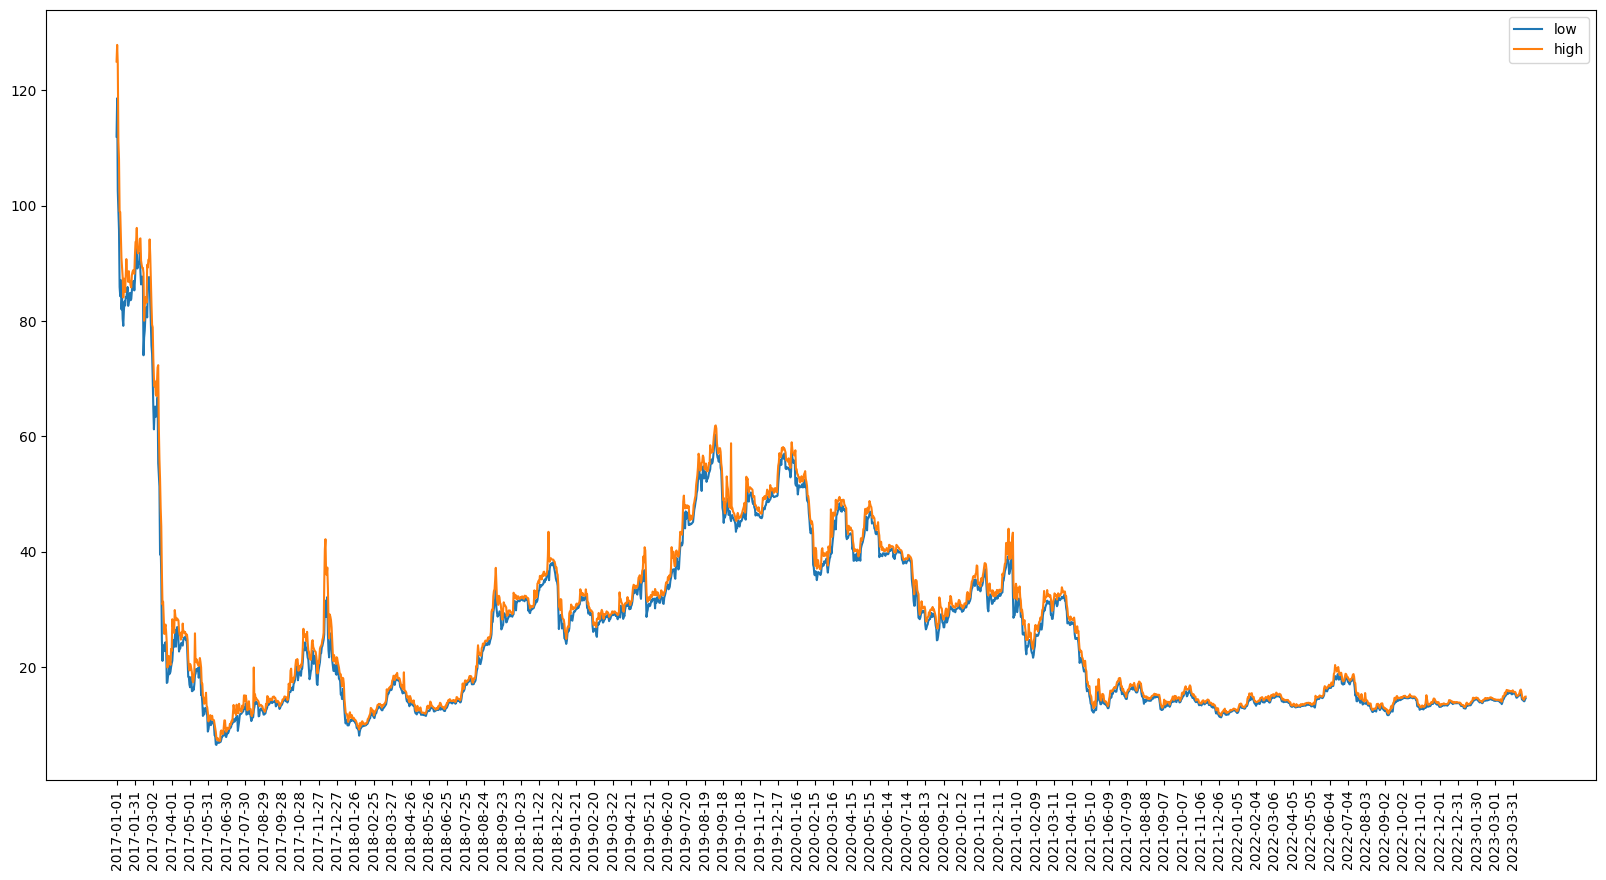

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(analysis_df["date_str"], analysis_df["btc_eth_low"], label="low")
plt.plot(analysis_df["date_str"], analysis_df["btc_eth_high"], label="high")
plt.xticks(analysis_df["date_str"][::30], rotation=90)
plt.legend()
plt.show()

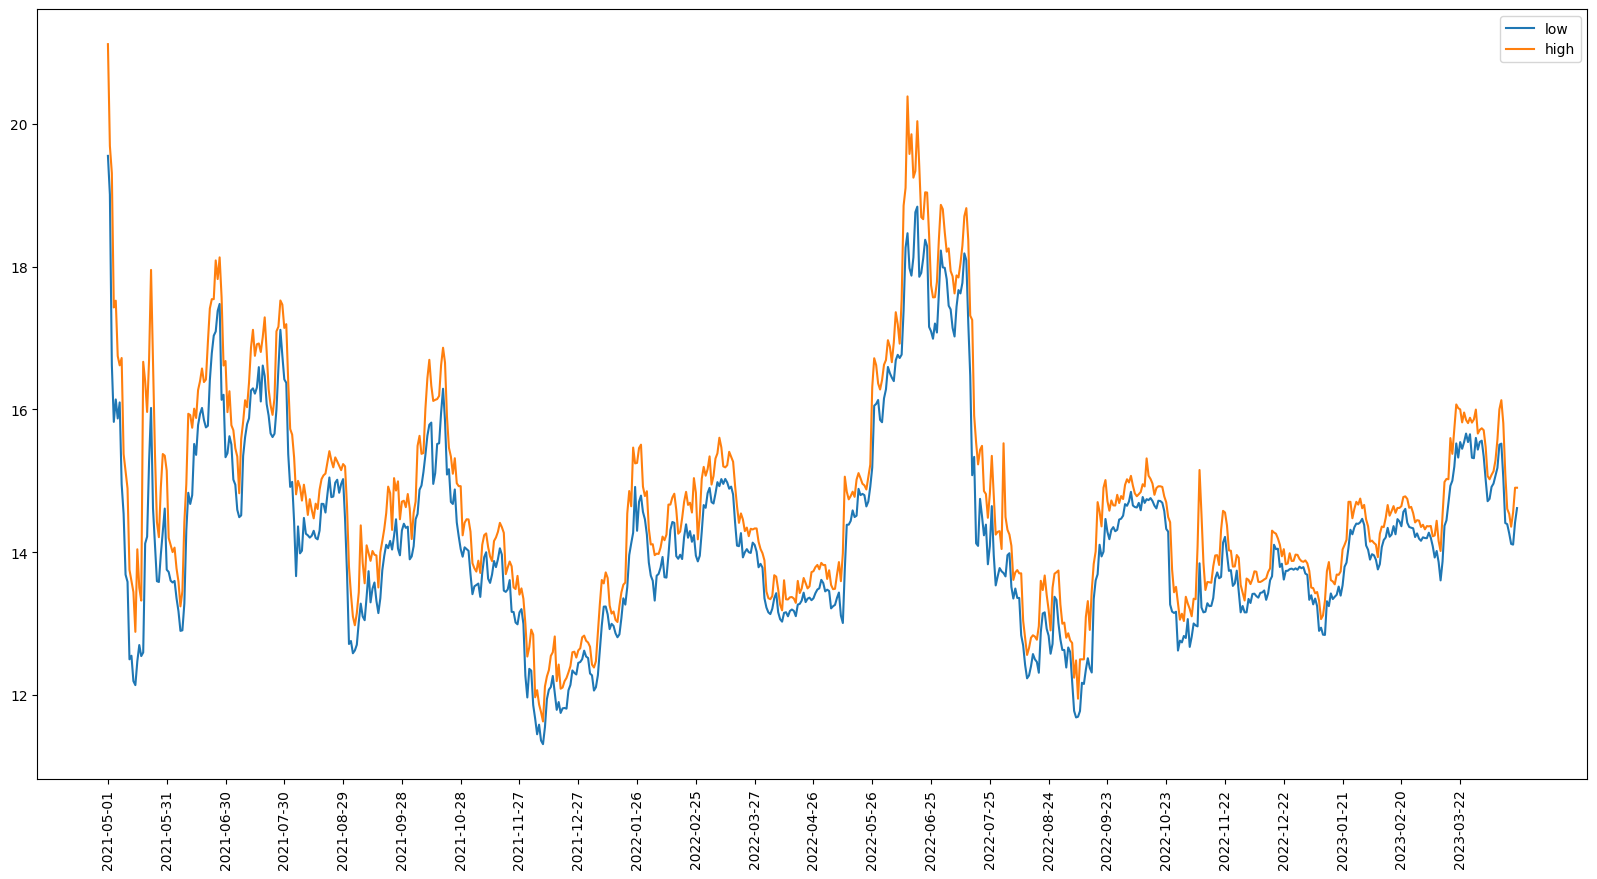

In [66]:
### 2021-05-01 后这两年 BTC 和 ETH 的资产相关性更明显
analysis_df = df[df["date_str"] >= "2021-05-01"][["date_str", "btc_eth_low", "btc_eth_high"]]

plt.figure(figsize=(20, 10))
plt.plot(analysis_df["date_str"], analysis_df["btc_eth_low"], label="low")
plt.plot(analysis_df["date_str"], analysis_df["btc_eth_high"], label="high")
plt.xticks(analysis_df["date_str"][::30], rotation=90)
plt.legend()
plt.show()

In [68]:
analysis_df.describe()

,btc_eth_low,btc_eth_high
count,720.000000,720.000000
mean,14.221512,14.719812
std,1.375994,1.505070
min,11.312217,11.630612
25%,13.344009,13.708489
50%,14.046917,14.502218
75%,14.799467,15.329783
max,19.550342,21.114865


In [70]:
df.tail()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,btc_eth_low,btc_eth_high,data,date_str
2296,1681603200000,0.07010,0.06879,0.06902,0.06991,343.287,23.80522,0.06934,14.265335,14.536997,1681603200000,2023-04-16
2297,1681689600000,0.07084,0.06965,0.06991,0.07047,345.325,24.26315,0.07026,14.116318,14.357502,1681689600000,2023-04-17
2298,1681776000000,0.07089,0.06870,0.07048,0.06921,292.17,20.32662,0.06957,14.106362,14.556041,1681776000000,2023-04-18
2299,1681862400000,0.06936,0.06710,0.06924,0.06717,522.657,35.66393,0.06824,14.417532,14.903130,1681862400000,2023-04-19
2300,1681948800000,0.06841,0.06710,0.06715,0.06841,198.737,13.45478,0.0677,14.617746,14.903130,1681948800000,2023-04-20


In [71]:
print(utc_timestamp_to_date(1682035200))

2023-04-21 00:00:00+00:00


In [73]:
print(utc_timestamp_to_date(1681948800))

2023-04-20 00:00:00+00:00


In [11]:
start_date = datetime(2021, 5, 1)
start_timestamp = date_to_utc_timestamp(start_date)
print(start_timestamp)

1619827200


In [19]:
### fetch trading data
pool_query = """
query poolDayDatas($start_time: Int!){
    poolDayDatas(
        where: { pool: "0xcbcdf9626bc03e24f779434178a73a0b4bad62ed", date_gt: $start_time }
    orderBy: date
    orderDirection: asc
    ) {
        date
        # in range liquidity at end of period
        liquidity
        # current price tracker at end of period
        sqrtPrice
        # price of token0 - derived from sqrtPrice
        tick
        # tvl derived in USD at end of period
        tvlUSD
        # volume in token0
        volumeToken0
        # volume in token1
        volumeToken1
        # volume in USD
        volumeUSD
        # fees in USD
        feesUSD
        # numebr of transactions during period
        txCount
        # opening price of token0
        open
        # high price of token0
        high
        # low price of token0
        low
        # close price of token0
        close
        }
}
"""

In [18]:
print(start_timestamp)

1619827200


In [22]:
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport


client = Client(
    transport=RequestsHTTPTransport(
        url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3',
        verify=True,
        retries=5,
    ))


variables = {"start_time": start_timestamp}
response = client.execute(gql(pool_query), variable_values=variables)
print(len(response["poolDayDatas"]))

100


In [29]:
variables = {"start_time": start_timestamp}
response = client.execute(gql(pool_query), variable_values=variables)
trade_data = response["poolDayDatas"]
trade_all_data = trade_data

while len(trade_data) > 0:
    print(utc_timestamp_to_date(start_timestamp))
    print(len(trade_all_data))
    start_timestamp = trade_data[-1]['date']
    variables = {"start_time": start_timestamp}
    response = client.execute(gql(pool_query), variable_values=variables)
    trade_data = response["poolDayDatas"]
    trade_all_data += trade_data

2021-05-01 00:00:00+00:00
100
2021-08-11 00:00:00+00:00
200
2021-11-19 00:00:00+00:00
300
2022-02-27 00:00:00+00:00
400
2022-06-07 00:00:00+00:00
500
2022-09-15 00:00:00+00:00
600
2022-12-24 00:00:00+00:00
700
2023-04-03 00:00:00+00:00
719


In [37]:
import pandas as pd


uniswap_df = pd.DataFrame(trade_all_data)
uniswap_df.head()

,date,liquidity,sqrtPrice,tick,tvlUSD,volumeToken0,volumeToken1,volumeUSD,feesUSD,txCount,open,high,low,close
0,1620086400,34777181970750,31772030779696575139435859918219663,258048,0,0.00186388,0.03,0,0,10,0,0.06236150594498290588648261246443894,0,0
1,1620172800,58107907112361703,31960393978736796928142651710380845,258166,8760155.104262971994086498467357258,8.6328427,142.066274994259621104,492532.4489385855273489587591769112,1477.597346815756582046876277530734,93,0.06218264886955532039137026859622124,0.06218264886955532039137026859622124,0.05962991664934483102765101457611418,0.06218264886955532039137026859622124
2,1620259200,103357834300594396,31797140749342785936917147234528874,258064,34598198.32184739378032906690193207,132.0575394,2145.953858237057074882,7507953.765040102555049768885098818,22523.86129512030766514930665529646,385,0.06144842443668027987206017512840567,0.06264772850620372582198254119268865,0.05978175693595542453134069268655383,0.06144842443668027987206017512840567
3,1620345600,123663143553149385,32204940835654975584293808893917703,258318,45080249.13563143851889233196555717,191.9184649,3141.886951289576348753,10970518.22093735639332306265737916,32911.55466281206917996918797213746,317,0.06208447728091419860810341124185172,0.06208447728091419860810341124185172,0.06027593967096694797714181982045018,0.06208447728091419860810341124185172
4,1620432000,140576450677868029,30773121242794498098739626896353215,257409,53072936.29120250212115811265845347,396.72040868,6318.655938257618300561,23273349.19535532043066027548158071,69820.04758606596129198082644474195,238,0.06052212332964804782286236916211365,0.06666959016117263485640222658536949,0.06010105016397802545536350090083188,0.06052212332964804782286236916211365


In [34]:
uniswap_df.index

RangeIndex(start=1, stop=719, step=1)

In [38]:
uniswap_df.drop(index=0, inplace=True)
uniswap_df["high"] = uniswap_df["high"].astype(float)
uniswap_df["low"] = uniswap_df["low"].astype(float)
uniswap_df["btc_eth_low"] = 1 / uniswap_df["high"]
uniswap_df["btc_eth_high"] = 1 / uniswap_df["low"]
uniswap_df.head()

,date,liquidity,sqrtPrice,tick,tvlUSD,volumeToken0,volumeToken1,volumeUSD,feesUSD,txCount,open,high,low,close,btc_eth_low,btc_eth_high
1,1620172800,58107907112361703,31960393978736796928142651710380845,258166,8760155.104262971994086498467357258,8.6328427,142.066274994259621104,492532.4489385855273489587591769112,1477.597346815756582046876277530734,93,0.06218264886955532039137026859622124,0.062183,0.059630,0.06218264886955532039137026859622124,16.081657,16.770106
2,1620259200,103357834300594396,31797140749342785936917147234528874,258064,34598198.32184739378032906690193207,132.0575394,2145.953858237057074882,7507953.765040102555049768885098818,22523.86129512030766514930665529646,385,0.06144842443668027987206017512840567,0.062648,0.059782,0.06144842443668027987206017512840567,15.962271,16.727511
3,1620345600,123663143553149385,32204940835654975584293808893917703,258318,45080249.13563143851889233196555717,191.9184649,3141.886951289576348753,10970518.22093735639332306265737916,32911.55466281206917996918797213746,317,0.06208447728091419860810341124185172,0.062084,0.060276,0.06208447728091419860810341124185172,16.107086,16.590368
4,1620432000,140576450677868029,30773121242794498098739626896353215,257409,53072936.29120250212115811265845347,396.72040868,6318.655938257618300561,23273349.19535532043066027548158071,69820.04758606596129198082644474195,238,0.06052212332964804782286236916211365,0.066670,0.060101,0.06052212332964804782286236916211365,14.999342,16.638644
5,1620518400,167116742785215084,30574004267804741393052469344115602,257279,61029766.66188722833760259359925029,416.32379537,6224.60517381071203969,24152045.91680993200346105526349502,72456.13775042979601038316579048519,244,0.06616022858235130552982802757987464,0.068402,0.065337,0.06616022858235130552982802757987464,14.619351,15.305329


In [39]:
uniswap_df["tvlUSD"] = uniswap_df["tvlUSD"].astype(float)
uniswap_df["feesUSD"] = uniswap_df["feesUSD"].astype(float)
uniswap_df["fees_rate"] = uniswap_df["feesUSD"] / uniswap_df["tvlUSD"]
uniswap_df.head()

,date,liquidity,sqrtPrice,tick,tvlUSD,volumeToken0,volumeToken1,volumeUSD,feesUSD,txCount,open,high,low,close,btc_eth_low,btc_eth_high,fees_rate
1,1620172800,58107907112361703,31960393978736796928142651710380845,258166,8.760155e+06,8.6328427,142.066274994259621104,492532.4489385855273489587591769112,1477.597347,93,0.06218264886955532039137026859622124,0.062183,0.059630,0.06218264886955532039137026859622124,16.081657,16.770106,0.000169
2,1620259200,103357834300594396,31797140749342785936917147234528874,258064,3.459820e+07,132.0575394,2145.953858237057074882,7507953.765040102555049768885098818,22523.861295,385,0.06144842443668027987206017512840567,0.062648,0.059782,0.06144842443668027987206017512840567,15.962271,16.727511,0.000651
3,1620345600,123663143553149385,32204940835654975584293808893917703,258318,4.508025e+07,191.9184649,3141.886951289576348753,10970518.22093735639332306265737916,32911.554663,317,0.06208447728091419860810341124185172,0.062084,0.060276,0.06208447728091419860810341124185172,16.107086,16.590368,0.000730
4,1620432000,140576450677868029,30773121242794498098739626896353215,257409,5.307294e+07,396.72040868,6318.655938257618300561,23273349.19535532043066027548158071,69820.047586,238,0.06052212332964804782286236916211365,0.066670,0.060101,0.06052212332964804782286236916211365,14.999342,16.638644,0.001316
5,1620518400,167116742785215084,30574004267804741393052469344115602,257279,6.102977e+07,416.32379537,6224.60517381071203969,24152045.91680993200346105526349502,72456.137750,244,0.06616022858235130552982802757987464,0.068402,0.065337,0.06616022858235130552982802757987464,14.619351,15.305329,0.001187


In [46]:
uniswap_df.to_csv("uniswap_data.csv", index=False)

In [1]:
import pandas as pd

uniswap_df = pd.read_csv("uniswap_data.csv")

In [2]:
uniswap_df.head()

,date,liquidity,sqrtPrice,tick,tvlUSD,volumeToken0,volumeToken1,volumeUSD,feesUSD,txCount,open,high,low,close,btc_eth_low,btc_eth_high,fees_rate
0,1620172800,58107907112361703,31960393978736796928142651710380845,258166,8.760155e+06,8.632843,142.066275,4.925324e+05,1477.597347,93,0.062183,0.062183,0.059630,0.062183,16.081657,16.770106,0.000169
1,1620259200,103357834300594396,31797140749342785936917147234528874,258064,3.459820e+07,132.057539,2145.953858,7.507954e+06,22523.861295,385,0.061448,0.062648,0.059782,0.061448,15.962271,16.727511,0.000651
2,1620345600,123663143553149385,32204940835654975584293808893917703,258318,4.508025e+07,191.918465,3141.886951,1.097052e+07,32911.554663,317,0.062084,0.062084,0.060276,0.062084,16.107086,16.590368,0.000730
3,1620432000,140576450677868029,30773121242794498098739626896353215,257409,5.307294e+07,396.720409,6318.655938,2.327335e+07,69820.047586,238,0.060522,0.066670,0.060101,0.060522,14.999342,16.638644,0.001316
4,1620518400,167116742785215084,30574004267804741393052469344115602,257279,6.102977e+07,416.323795,6224.605174,2.415205e+07,72456.137750,244,0.066160,0.068402,0.065337,0.066160,14.619351,15.305329,0.001187


In [8]:
analysis_df = uniswap_df[["date", "feesUSD", "btc_eth_low", "btc_eth_high", "fees_rate"]]

analysis_df["date_str"] = analysis_df["date"].apply(utc_timestamp_to_date_str, ms=False)
analysis_df.rename(columns={"feesUSD": "fees_usd"}, inplace=True)
analysis_df.head()

/var/folders/sj/9n8j6m2s6_1g9x78vzd8z0rm0000gn/T/ipykernel_38874/151963569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df["date_str"] = analysis_df["date"].apply(utc_timestamp_to_date_str, ms=False)
/var/folders/sj/9n8j6m2s6_1g9x78vzd8z0rm0000gn/T/ipykernel_38874/151963569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.rename(columns={"feesUSD": "fees_usd"}, inplace=True)


,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate,date_str
0,1620172800,1477.597347,16.081657,16.770106,0.000169,2021-05-05
1,1620259200,22523.861295,15.962271,16.727511,0.000651,2021-05-06
2,1620345600,32911.554663,16.107086,16.590368,0.000730,2021-05-07
3,1620432000,69820.047586,14.999342,16.638644,0.001316,2021-05-08
4,1620518400,72456.137750,14.619351,15.305329,0.001187,2021-05-09


In [9]:
analysis_df.describe()

,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate
count,7.180000e+02,718.000000,718.000000,718.000000,7.180000e+02
mean,1.651147e+09,89904.192921,14.249691,14.634470,4.034435e-04
std,1.792049e+07,89310.319723,1.352420,1.455053,5.085527e-04
min,1.620173e+09,205.406085,11.355202,11.576706,8.538575e-07
25%,1.635660e+09,39971.863042,13.380307,13.646154,1.604053e-04
50%,1.651147e+09,69051.283956,14.097470,14.420786,2.766204e-04
75%,1.666634e+09,111974.993536,14.827294,15.233598,4.593502e-04
max,1.682122e+09,943943.776271,18.861848,20.331393,5.512135e-03


In [15]:
analysis_df["eth_price"] = analysis_df["btc_eth_low"] * 0.5 + analysis_df["btc_eth_high"] * 0.5
analysis_df.describe()

/var/folders/sj/9n8j6m2s6_1g9x78vzd8z0rm0000gn/T/ipykernel_38874/2794727310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df["eth_price"] = analysis_df["btc_eth_low"] * 0.5 + analysis_df["btc_eth_high"] * 0.5


,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate,eth_price
count,7.180000e+02,718.000000,718.000000,718.000000,7.180000e+02,718.000000
mean,1.651147e+09,89904.192921,14.249691,14.634470,4.034435e-04,14.442080
std,1.792049e+07,89310.319723,1.352420,1.455053,5.085527e-04,1.395927
min,1.620173e+09,205.406085,11.355202,11.576706,8.538575e-07,11.465954
25%,1.635660e+09,39971.863042,13.380307,13.646154,1.604053e-04,13.508343
50%,1.651147e+09,69051.283956,14.097470,14.420786,2.766204e-04,14.276920
75%,1.666634e+09,111974.993536,14.827294,15.233598,4.593502e-04,15.026326
max,1.682122e+09,943943.776271,18.861848,20.331393,5.512135e-03,19.419265


In [17]:
analysis_df["eth_price"].quantile([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

0.05    12.495050
0.10    12.932215
0.20    13.376059
0.30    13.630447
0.40    13.944132
0.50    14.276920
0.60    14.518084
0.70    14.834899
0.80    15.276973
0.90    16.384689
0.95    17.321522
Name: eth_price, dtype: float64

In [ ]:
### draw graph, with date_str column as X axis, btc_eth_low and btc_eth_high as Y axis left, fees_rate is also Y axis right
### btc_eth_low and btc_eth_high as Y axis left, fees_rate is also Y axis right

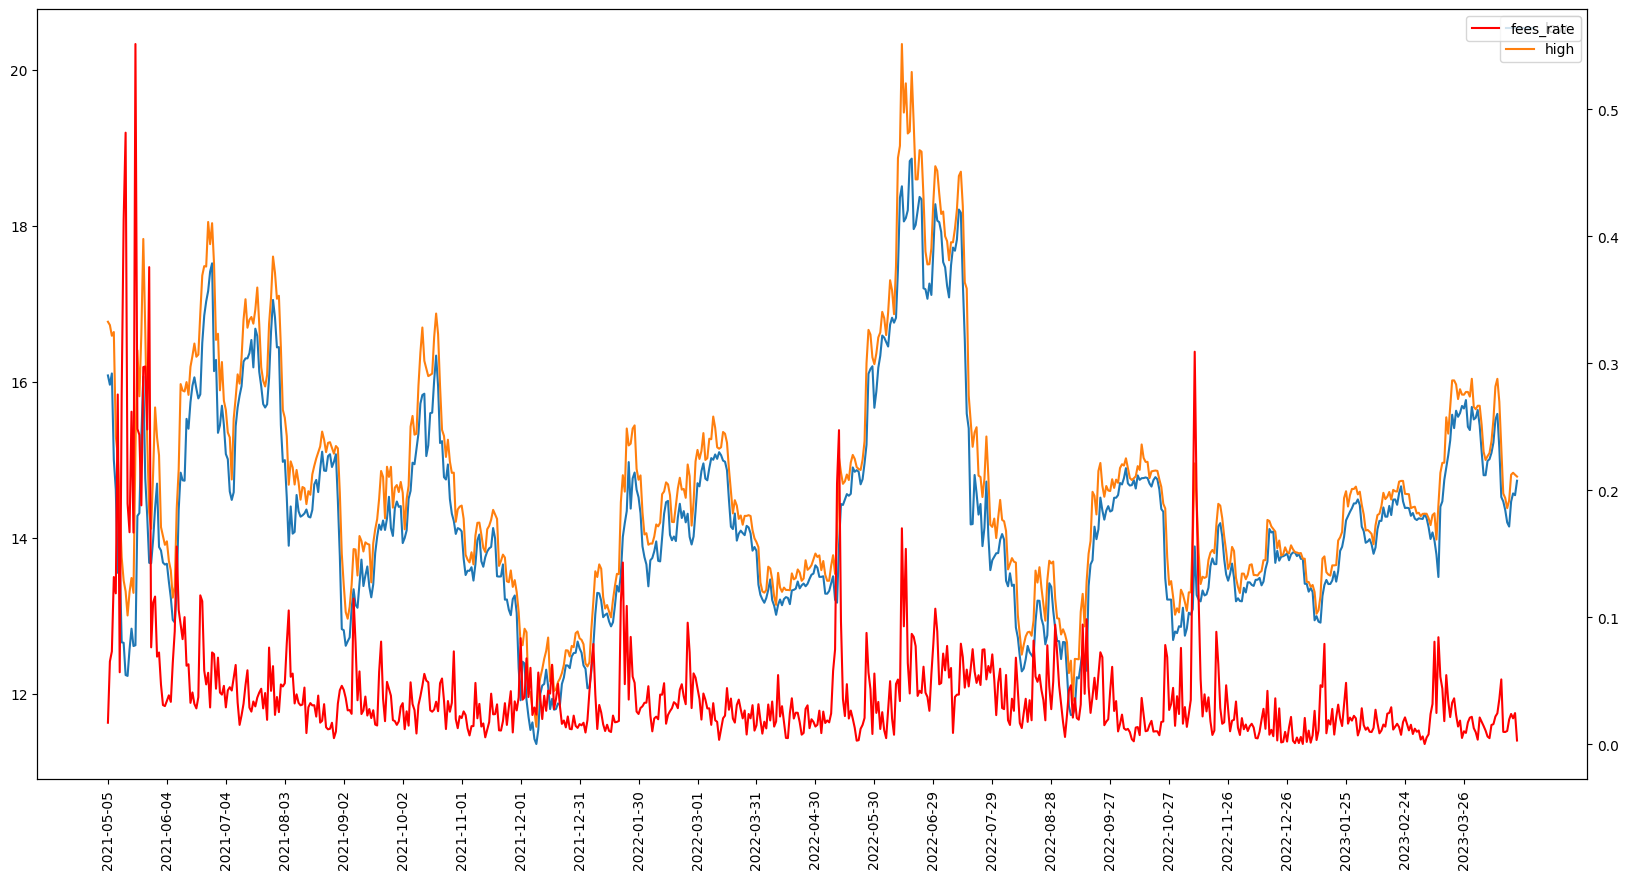

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(analysis_df["date_str"], analysis_df["btc_eth_low"], label="low")
plt.plot(analysis_df["date_str"], analysis_df["btc_eth_high"], label="high")
plt.xticks(analysis_df["date_str"][::30], rotation=90)
plt.legend()

ax2 = plt.twinx()
plt.plot(analysis_df["date_str"], analysis_df["fees_rate"] * 100, label="fees_rate", color="red")
plt.xticks(analysis_df["date_str"][::30], rotation=90)
plt.legend()

plt.show()

In [14]:
### remove the early age exceptional data
record_df = analysis_df[analysis_df["date_str"] >= "2021-06-01"]

### analysis_df columns: date_str, btc_eth_low, btc_eth_high, fees_rate to list of dict
record = record_df[["date_str", "btc_eth_low", "btc_eth_high", "fees_rate"]].to_dict("records")
record[0]

{'date_str': '2021-06-01',
 'btc_eth_low': 13.83684106171051,
 'btc_eth_high': 14.136458243404284,
 'fees_rate': 0.0004679819276573}

In [19]:
print(len(record))

691


In [20]:
record[-1]

{'date_str': '2023-04-22',
 'btc_eth_low': 14.731311847533936,
 'btc_eth_high': 14.785015918836892,
 'fees_rate': 2.8499195276594068e-05}

In [50]:
def annual_revenue(revenue, days=691):
    return revenue * 365 / days

In [55]:
### calculate the revenue of the range without considering the liquidity pool distribution, so the calculation result is the bottom line
def range_revenue(start_quantile=0, end_quantile=1, last_days=365, is_compound=False):
    temp_df = analysis_df.tail(last_days)
    print(temp_df.shape)
    start_price = temp_df["eth_price"].quantile(start_quantile)
    end_price = temp_df["eth_price"].quantile(end_quantile)
    fee_improve_rate = 1 / (end_quantile - start_quantile)

    print("start_price: ", start_price)
    print("end_price: ", end_price)
    print("fee_improve_rate: ", fee_improve_rate)

    all_fees = 1

    for r in record[-last_days:]:
        avg_price = (r["btc_eth_low"] + r["btc_eth_high"]) / 2
        if start_price < avg_price < end_price:
            if not is_compound:
                all_fees += r["fees_rate"] * fee_improve_rate
            else:
                all_fees = all_fees * (1 + r["fees_rate"] * fee_improve_rate)
    return all_fees - 1

In [67]:
def print_result(start_quantile=0, end_quantile=1, last_days=365):
    print("start_quantile: ", start_quantile)
    print("end_quantile: ", end_quantile)
    revenue = range_revenue(start_quantile, end_quantile, last_days)
    print()
    print("revenue: ", revenue)
    print("annual_revenue: ", annual_revenue(revenue, last_days))
    print()


last_days = 180

print_result(0, 1, last_days)
print_result(0.05, 0.95, last_days)
print_result(0.1, 0.9, last_days)
print_result(0.15, 0.85, last_days)
print_result(0.2, 0.8, last_days)
print_result(0.25, 0.75, last_days)
print_result(0.3, 0.7, last_days)
print_result(0.35, 0.65, last_days)
print_result(0.4, 0.6, last_days)

start_quantile:  0
end_quantile:  1
start_price:  12.905368090015363
end_price:  15.858106304551047
fee_improve_rate:  1.0

revenue:  0.043906632390915856
annual_revenue:  0.08903289345935715

start_quantile:  0.05
end_quantile:  0.95
start_price:  13.094769838587364
end_price:  15.712880215786319
fee_improve_rate:  1.1111111111111112

revenue:  0.04486406812393384
annual_revenue:  0.0909743603624214

start_quantile:  0.1
end_quantile:  0.9
start_price:  13.323464130217804
end_price:  15.446435090321076
fee_improve_rate:  1.25

revenue:  0.04508811705093074
annual_revenue:  0.09142868179772068

start_quantile:  0.15
end_quantile:  0.85
start_price:  13.408721768033233
end_price:  14.907990505915436
fee_improve_rate:  1.4285714285714286

revenue:  0.046068515575634184
annual_revenue:  0.09341671213948044

start_quantile:  0.2
end_quantile:  0.8
start_price:  13.487645124089514
end_price:  14.638356090504022
fee_improve_rate:  1.6666666666666665

revenue:  0.047539119739933744
annual_rev

In [79]:
temp_df = analysis_df.tail(270)
temp_df.describe()

,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate,eth_price
count,2.700000e+02,270.000000,270.000000,270.000000,2.700000e+02,270.000000
mean,1.670501e+09,66330.651449,13.874225,14.142907,2.767412e-04,14.008566
std,6.746673e+06,64991.326511,0.849397,0.827331,2.996069e-04,0.832183
min,1.658880e+09,205.406085,11.726531,11.909443,8.538575e-07,11.822405
25%,1.664690e+09,25493.067301,13.356748,13.554817,1.094573e-04,13.469989
50%,1.670501e+09,47681.196267,13.832202,14.160158,1.916474e-04,13.991840
75%,1.676311e+09,79031.822232,14.440808,14.667175,3.480634e-04,14.541342
max,1.682122e+09,529216.193535,15.765611,16.038623,3.089605e-03,15.858106


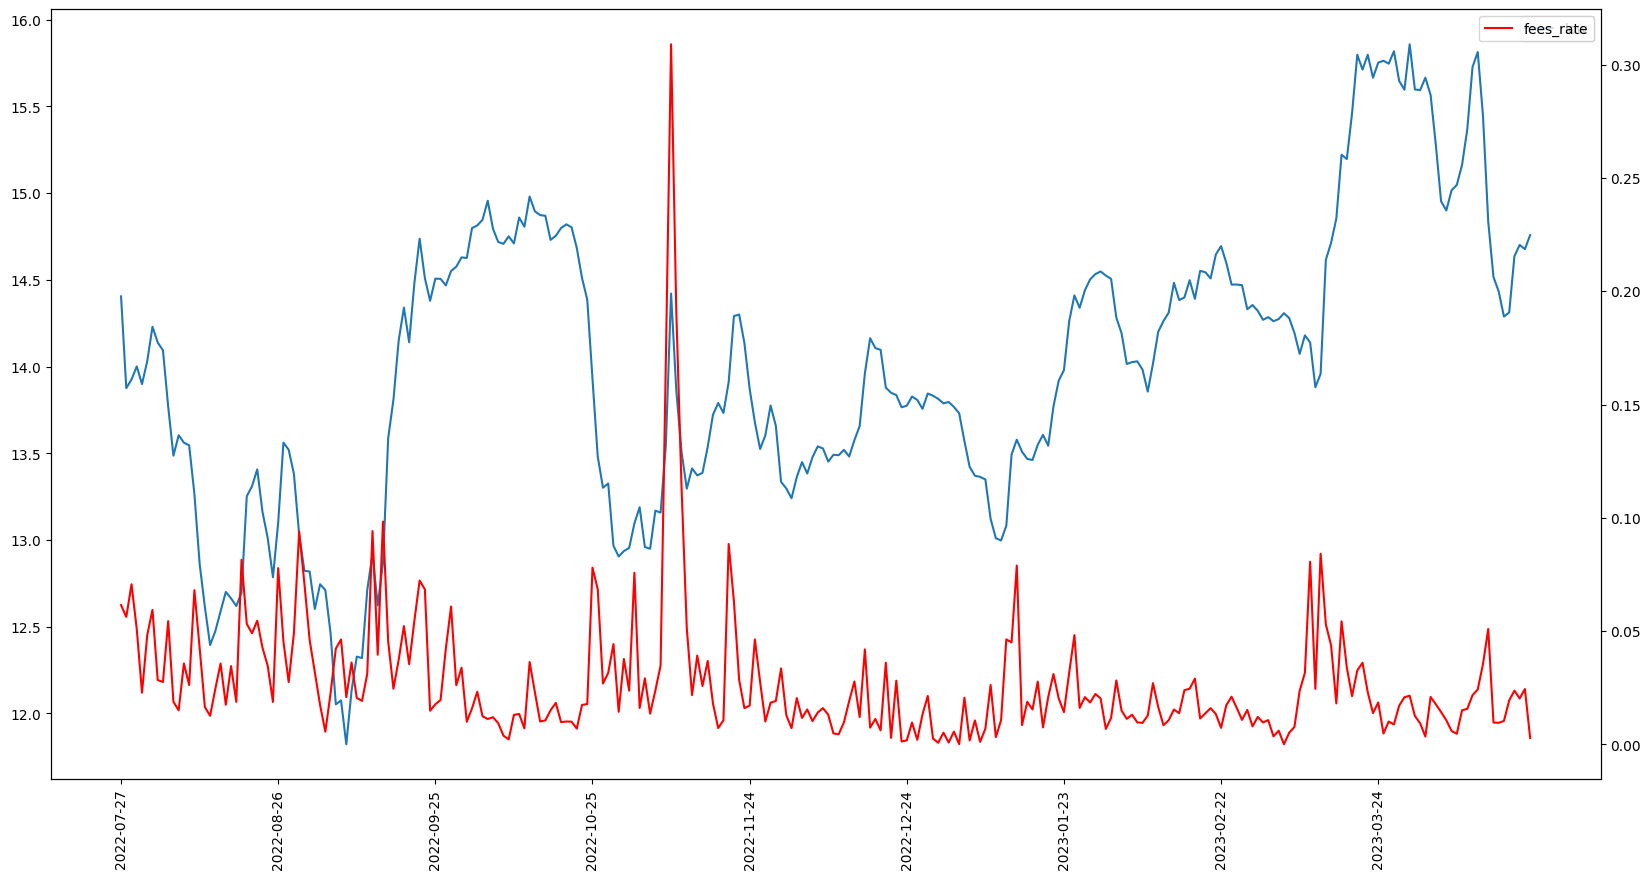

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(temp_df["date_str"], temp_df["eth_price"], label="low")
plt.xticks(temp_df["date_str"][::30], rotation=90)
plt.legend()

ax2 = plt.twinx()
plt.plot(temp_df["date_str"], temp_df["fees_rate"] * 100, label="fees_rate", color="red")
plt.xticks(temp_df["date_str"][::30], rotation=90)
plt.legend()

plt.show()

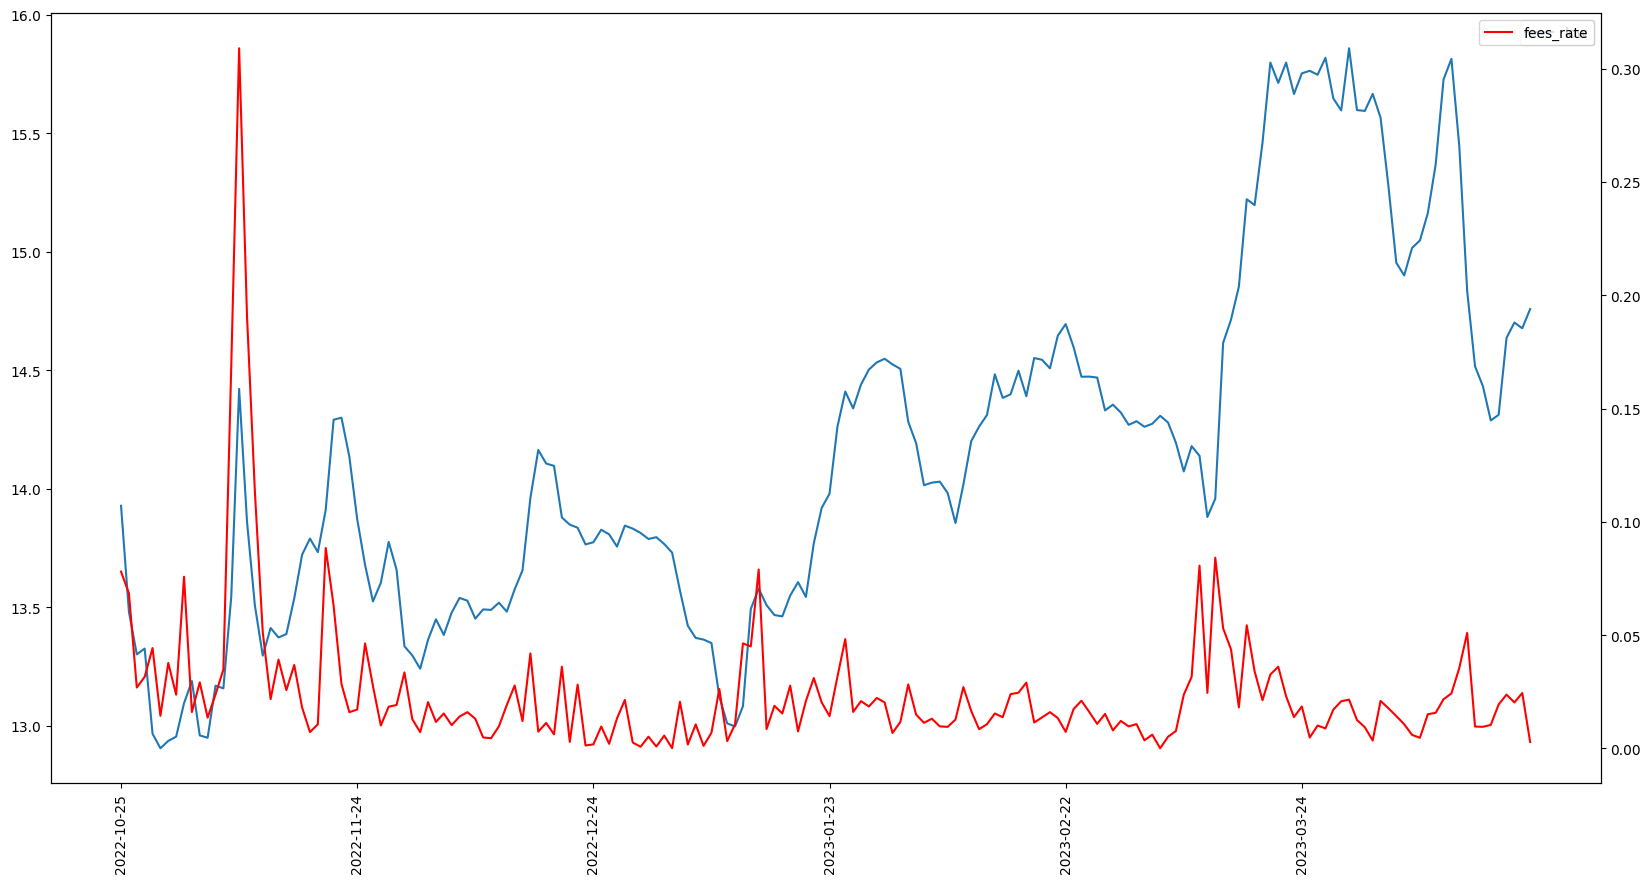

In [81]:
import matplotlib.pyplot as plt

temp_df = analysis_df.tail(180)

plt.figure(figsize=(20, 10))
plt.plot(temp_df["date_str"], temp_df["eth_price"], label="low")
plt.xticks(temp_df["date_str"][::30], rotation=90)
plt.legend()

ax2 = plt.twinx()
plt.plot(temp_df["date_str"], temp_df["fees_rate"] * 100, label="fees_rate", color="red")
plt.xticks(temp_df["date_str"][::30], rotation=90)
plt.legend()

plt.show()